In [65]:
import json
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from pprint import pprint

In [66]:
with open("annotation.json") as json_data:
    data = json.load(json_data)
    json_data.close()
    pprint(data)
    
annos = data[0]["annotations"][0]["result"]

[{'annotations': [{'completed_by': 1,
                   'created_at': '2023-10-09T20:49:27.528788Z',
                   'draft_created_at': '2023-10-09T20:44:07.092125Z',
                   'ground_truth': False,
                   'id': 12,
                   'import_id': None,
                   'last_action': None,
                   'last_created_by': None,
                   'lead_time': 363.404,
                   'parent_annotation': None,
                   'parent_prediction': None,
                   'prediction': {},
                   'project': 5,
                   'result': [{'from_name': 'bbox',
                               'id': 'SA-rrH7Kg_',
                               'image_rotation': 0,
                               'origin': 'manual',
                               'original_height': 256,
                               'original_width': 646,
                               'to_name': 'image',
                               'type': 'rectangle',
              

In [67]:
pprint(annos)

[{'from_name': 'bbox',
  'id': 'SA-rrH7Kg_',
  'image_rotation': 0,
  'origin': 'manual',
  'original_height': 256,
  'original_width': 646,
  'to_name': 'image',
  'type': 'rectangle',
  'value': {'height': 7.295088699080168,
            'rotation': 0,
            'width': 15.637319316688563,
            'x': 14.191852825229956,
            'y': 61.77162040078842}},
 {'from_name': 'label',
  'id': 'SA-rrH7Kg_',
  'image_rotation': 0,
  'origin': 'manual',
  'original_height': 256,
  'original_width': 646,
  'to_name': 'image',
  'type': 'labels',
  'value': {'height': 7.295088699080168,
            'labels': ['Text'],
            'rotation': 0,
            'width': 15.637319316688563,
            'x': 14.191852825229956,
            'y': 61.77162040078842}},
 {'from_name': 'transcription',
  'id': 'SA-rrH7Kg_',
  'image_rotation': 0,
  'origin': 'manual',
  'original_height': 256,
  'original_width': 646,
  'to_name': 'image',
  'type': 'textarea',
  'value': {'height': 7.295088699080

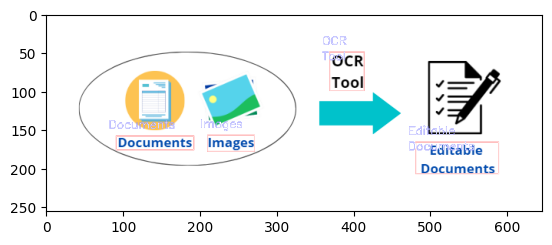

In [71]:
img = Image.open("OCR.png")
img = np.uint8(img).copy()
dy = 20

for anno in annos:
    # extra bbox and text
    if anno["from_name"] == "transcription":
        H, W = anno["original_height"]/100, anno["original_width"]/100
        val = anno["value"]
        x, y, w, h = int(W*val["x"]), int(H*val["y"]), int(W*val["width"]), int(H*val["height"])
        img = cv.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 1)
        
        texts = val["text"][0].split("\n")
        y = y-dy
        
        for text in texts:
            y = y + dy
            # label with cv2
            img = cv.putText(img, text, (x-10, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), thickness=1)

plt.figure()
plt.imshow(img)